In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#load dataset
df = pd.read_csv('D:/DSData/Concrete_Data.csv')
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#datatype
df.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [5]:
#Checking for any null values
print(df.isnull().any())

Cement              False
Blast               False
Fly Ash             False
Water               False
Superplasticizer    False
CA                  False
FA                  False
Age                 False
CMS                 False
dtype: bool


In [6]:
df.shape

(1030, 9)

In [7]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Univariate Analysis

In [8]:
df.Cement.value_counts().head()

362.6    20
425.0    20
251.4    15
310.0    14
446.0    14
Name: Cement, dtype: int64

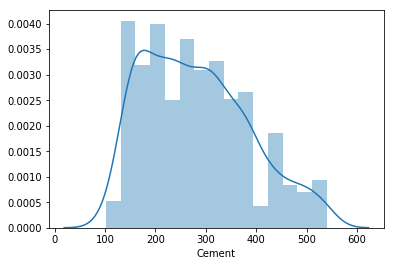

In [20]:
sns.distplot(df['Cement'])
plt.show()

In [21]:
df.CMS.value_counts().head()

33.40    6
71.30    4
41.05    4
31.35    4
23.52    4
Name: CMS, dtype: int64

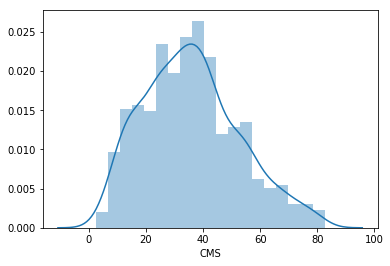

In [23]:
sns.distplot(df['CMS'])
plt.show()

# Bivariate analysis

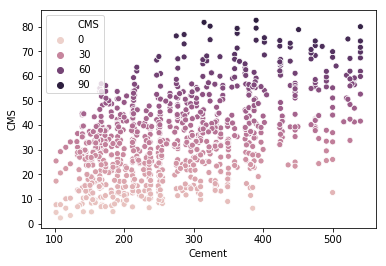

In [25]:
sns.scatterplot(x='Cement', y='CMS', hue='CMS', data=df)

In [76]:
#which Age has highest average Strength
df.groupby(['Age']).agg({'CMS': 'mean'}).sort_values(by= 'CMS', ascending = False).head()

,CMS
Age,
91,69.808636
56,51.890220
270,51.272308
100,47.668846
365,43.557857


# Heatmap

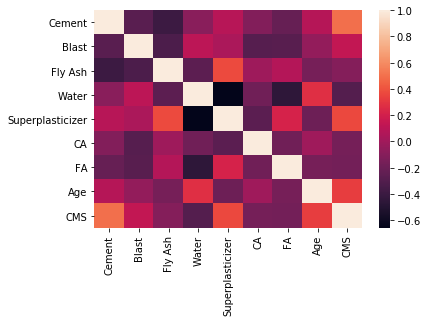

In [31]:
 heat_map = sns.heatmap(df.corr())

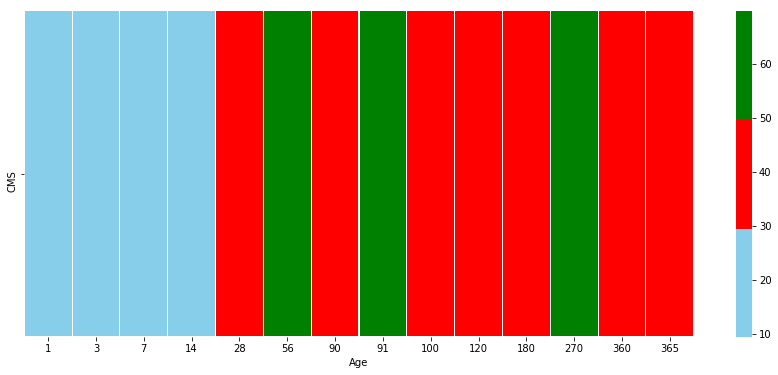

In [32]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='Age',values=["CMS"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# Removing outliers

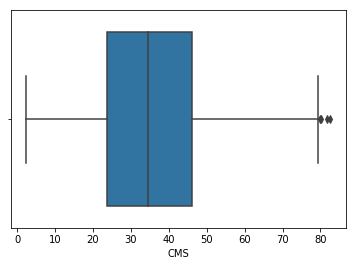

In [73]:
sns.boxplot(df['CMS'])

In [35]:
#z-score
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3)) #first array contains list of rows and second array contains list of columns

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [36]:
#Inter quartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cement              157.625
Blast               142.950
Fly Ash             118.300
Water                27.100
Superplasticizer     10.200
CA                   97.400
FA                   93.050
Age                  49.000
CMS                  22.425
dtype: float64


In [38]:
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

      Cement  Blast  Fly Ash  Water  Superplasticizer     CA     FA    Age  \
0      False  False    False  False             False  False  False  False   
1      False  False    False  False             False  False  False  False   
2      False  False    False  False             False  False  False   True   
3      False  False    False  False             False  False  False   True   
4      False  False    False  False             False  False  False   True   
5      False  False    False  False             False  False  False  False   
6      False  False    False  False             False  False  False   True   
7      False  False    False  False             False  False  False  False   
8      False  False    False  False             False  False  False  False   
9      False  False    False  False             False  False  False  False   
10     False  False    False  False             False  False  False  False   
11     False  False    False  False             False  False  Fa

In [48]:
df1 = df[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [49]:
df1.shape

(981, 9)

# Modeling

In [61]:
#split dataset in target values and features
y = df1.iloc[:, -1].values
X = df1.iloc[:, :-1].values

In [62]:
#split dataset into train and test (70-30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [63]:
#define model with 3 hidden layers of 20 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=8))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
#train model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
686/686 [==============================] - 0s 366us/step - loss: 460.0806
Epoch 2/100
686/686 [==============================] - 0s 93us/step - loss: 328.3951
Epoch 3/100
686/686 [==============================] - 0s 83us/step - loss: 277.1964
Epoch 4/100
686/686 [==============================] - 0s 76us/step - loss: 241.5594
Epoch 5/100
686/686 [==============================] - 0s 79us/step - loss: 211.7376
Epoch 6/100
686/686 [==============================] - 0s 95us/step - loss: 183.6204
Epoch 7/100
686/686 [==============================] - 0s 93us/step - loss: 154.9033
Epoch 8/100
686/686 [==============================] - 0s 87us/step - loss: 140.5379
Epoch 9/100
686/686 [==============================] - 0s 93us/step - loss: 121.3668
Epoch 10/100
686/686 [==============================] - 0s 87us/step - loss: 106.5260
Epoch 11/100
686/686 [==============================] - 0s 96us/step - loss: 92.6671
Epoch 12/100
686/686 [==============================] - 0s 87us

686/686 [==============================] - 0s 74us/step - loss: 41.9245
Epoch 98/100
686/686 [==============================] - 0s 80us/step - loss: 47.4967
Epoch 99/100
686/686 [==============================] - 0s 77us/step - loss: 39.6723
Epoch 100/100
686/686 [==============================] - 0s 79us/step - loss: 40.8263


In [68]:
#perform evaluation on train & test set
y_train_pred = model.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_pred)
print('MSE on train set ={}'.format(MSE_train))

y_test_pred = model.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_pred)
print('MSE on test set = {}'. format(MSE_test))

MSE on train set =39.28467218486767
MSE on test set = 42.6620796394442


In [66]:
import sklearn
from sklearn import metrics
r2_score = sklearn.metrics.r2_score(y_test, y_test_pred)
print('r2_score = {}'.format(r2_score))

r2_score = 0.8474985089297603


In [78]:
model.save("concrete")